In [1]:
from bridget.eddy.footprint import *

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("sampleDataHeader.csv", sep = ";")

#### Define a function to calculate the RMSE of a calculated variable and the same variable in the TK2 data:
Values of -9999 (rounded down) need to be excluded as these numbers are NaN in the TK2 data.

Also need to check the input data for these numbers later on!

In [3]:
def rmse_calc_tk2(var_calc, var_tk2):
    #exclude values equal to -9999.* (NaN in TK2 data)
    idx = [i for i, x in enumerate(var_tk2) if int(x) == -9999]
    var_tk2 = np.delete(np.array(var_tk2), idx)
    var_calc = np.delete(np.array(var_calc), idx)
    
    #calculate the RMSE
    return np.sqrt(((var_calc - var_tk2) ** 2).mean())

In [4]:
u_star = u_star_calc(cov_uw=df['Cov(u\'w\')[m2/s2]'], cov_vw=df['Cov(v\'w\')[m2/s2]'])

rmse_calc_tk2(u_star, df['ustar[m/s]'])

2.0410041752081045e-07

Calculated u_star is in accordance with the TK2 data with a very low RMSE of 2x10<sup>-7</sup>


In [5]:
e_w = sat_vapor_pressure_calc(p=df['p_ref[hPa]'], t_air=df['T_ref[deg C]'])
rh = relative_humidity_calc(a=df['a[g/m3]'], t_air=df['T_ref[deg C]'], e_w=e_w)
e_a = act_vapor_pressure_calc(rh=rh, e_w=e_w)
rho = air_density_calc(p=df['p_ref[hPa]'], e_a=e_a, t_air=df['T_ref[deg C]'])
c_p = specific_heat_cap_calc(e_a=e_a, p=df['p_ref[hPa]'])
hts = sensible_heat_calc(rho=rho, c_p=c_p, cov_wt=df['Cov(w\'Ts\')[(m*deg C)/s]'])

rmse_calc_tk2(hts, df['HTs[W/m2]'])

14.574819022236122

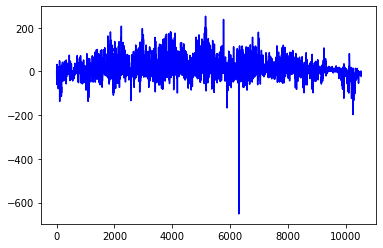

In [6]:
idx = [i for i, x in enumerate(df['HTs[W/m2]']) if int(x) == -9999]
hts_tk2 = np.delete(np.array(df['HTs[W/m2]']), idx)
hts_calc = np.delete(np.array(hts), idx)

plt.plot(hts_tk2, color = "blue")

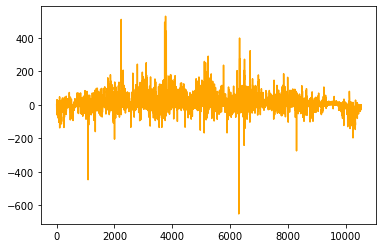

In [7]:
plt.plot(hts_calc, color = "orange")

Calculated HTS is similar to the TK2 data but not perfectly matching.
Looks like outliers are removed in the TK2 data (plots) but I don´t know how.
Dissimilarities could also origin from the calculation of e_w, rh, e_a, rho or c_p but it is not possible to test these calculations with the TK2 dataset as these values are not present here.

In [8]:
L = obukhov_length_calc(rho=rho, c_p=c_p, u_star=u_star, t_air=df['Ts[deg C]'], hts=hts)

z=2
zL=z/L

rmse_calc_tk2(zL, df['z/L'])

23.321798235667057

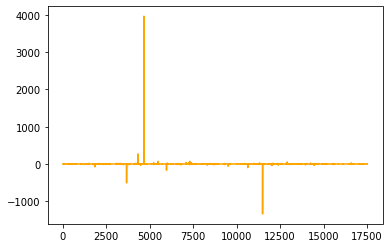

In [10]:
plt.plot(zL, color = "orange")

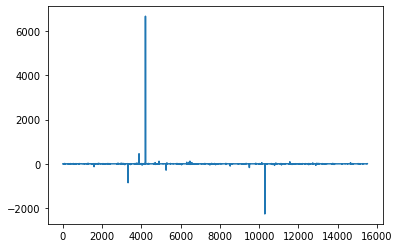

In [18]:
idx_zol = [i for i, x in enumerate(df['z/L']) if int(x) == -9999]
zol_tk2 = np.delete(np.array(df['z/L']), idx_zol)
    
plt.plot(zol_tk2)

Obukhov length and z/L are also pretty much in accordance!
Measurement height z is not clearly defined (I just assumed 2 m)